In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

stops_cols = ["Longitude", "Latitude"]
stops = pd.read_csv('stops.csv',names=stops_cols)
distances_cols = ['stop0','stop1','stop2','stop3','stop4','stop5','stop6','stop7','stop8','stop9','stop10','stop11']
distances = pd.read_csv('distances.csv',names=distances_cols)
distance_matrix = distances.to_numpy()

display(stops,distances)

,Longitude,Latitude
0,6.084592,3.647243
1,3.757416,5.566100
2,4.804498,4.596598
3,4.703749,4.920296
4,-8.178210,-0.909409
5,-7.778165,-1.765424
6,-7.054886,-2.096278
7,-8.078685,-0.019262
8,0.319826,1.534481
9,1.489526,2.431312


,stop0,stop1,stop2,stop3,stop4,stop5,stop6,stop7,stop8,stop9,stop10,stop11
0,0.000000,3.016249,1.593711,1.878135,14.972996,14.881969,14.339942,14.630164,6.139730,4.753223,7.337186,9.437255
1,3.016249,0.000000,1.426995,1.145691,13.579080,13.668243,13.252092,13.087764,5.298205,3.869137,7.183670,8.523919
2,1.593711,1.426995,0.000000,0.339015,14.102015,14.099600,13.617620,13.685123,5.430363,3.959483,7.016806,8.761438
3,1.878135,1.145691,0.339015,0.000000,14.139672,14.159697,13.692984,13.703644,5.539180,4.065252,7.196627,8.859165
4,14.972996,13.579080,14.102015,14.139672,0.000000,0.944880,1.634171,0.895693,8.842467,10.228662,8.306492,5.681336
5,14.881969,13.668243,14.099600,14.159697,0.944880,0.000000,0.795359,1.771833,8.744531,10.173626,7.982827,5.470240
6,14.339942,13.252092,13.617620,13.692984,1.634171,0.795359,0.000000,2.315634,8.220024,9.669853,7.326569,4.902991
7,14.630164,13.087764,13.685123,13.703644,0.895693,1.771833,2.315634,0.000000,8.541025,9.877043,8.225050,5.536049
8,6.139730,5.298205,5.430363,5.539180,8.842467,8.744531,8.220024,8.541025,0.000000,1.473941,2.174070,3.334985
9,4.753223,3.869137,3.959483,4.065252,10.228662,10.173626,9.669853,9.877043,1.473941,0.000000,3.352873,4.801986


In [2]:
def average_distance(distance_matrix):
    total_distance = 0
    num_stops = len(distance_matrix)
    print(num_stops)
    num_pairs = 0

    for i in range(num_stops):
        for j in range(i + 1, num_stops):
            total_distance += distance_matrix[i][j]
            num_pairs += 1

    return total_distance / num_pairs

# Assuming distance_matrix is available for 12 stops
avg_distance = average_distance(distance_matrix)
print("Average distance between each stop:", avg_distance)
print("Average distance for each route group", avg_distance*3)

12
Average distance between each stop: 7.429008645999803
Average distance for each route group 22.28702593799941


In [3]:
import random

class Generate():
    def __init__(self):
        self.num_vessels = 3
        self.stops_per_route = 4
        self.routes_np = None
        self.stops = stops
        self.stop_indices = list(range(0, len(stops)))
        

    def make_random_solution(self):
        random.shuffle(self.stop_indices)
        # divide the stops into sublists of length stops_per_route
        routes = np.array_split(self.stop_indices, self.num_vessels)
        self.routes_np = np.array(routes)
        return self.routes_np
    
    @property # Getter, no need to access like a method()
    def get_routes(self):
        if self.routes_np is None:
            self.make_random_solution()
        return self.routes_np

generate = Generate()


Generate Random Solution

Fitness function

In [4]:
def calc_route_distance(choosen_route,i):
    # print(f"🚢 Ferry Route #{i} : {choosen_route}")
    total_distance = 0
    for i, stop in enumerate(choosen_route):
        if i < len(choosen_route) - 1:
            next_stop = choosen_route[i + 1]
            total_distance += distance_matrix[stop][next_stop]
        # Return back to the origin stop (Circuit)
    total_distance += distance_matrix[choosen_route][-1][choosen_route][0]
    return total_distance
    


In [ ]:
calc_route_distance([0,1,2,3,4],1)

In [11]:
def test_fitness(routes):
    # print("Testing Fitness")
    # print(routes)
    total_violations = 0
    tolerance_distance = 5
    route_distance = []
    # Check if each route has 4 stops
    for i,route in enumerate(routes):
        # if len(route) !=4:
            # total_violations +=1
        route_distance.append(calc_route_distance(routes[i],i))

    # print("Route distance :" ,route_distance)
    # max_distance = max(route_distance)
    # min_distance = min(route_distance)
    # print("max" , max_distance)
    # print("min", min_distance)
    # return "Total Violations: " ,total_violations
    # print("Fitness score ", np.sum(route_distance))
    return route_distance
    
# fitness_function(randomize_route() )

# fitness_function(generate.get_routes)
# ferry_routes = [[4,5,10,0],[3,8,7,6],[11,1,9,2]]
# fitness_function(ferry_routes)

In [77]:
class InvalidRouteNumberError(Exception):
    pass

class Mutation_Operators():
    def __init__(self):
        pass
    
    def shuffle(self,solution):
        child = solution.copy()
        random_group = np.random.randint(0,len(child))
        np.random.shuffle(child[random_group])
        return child
        
    
    def swap(self,solution): # Pick two random stops and exchange their locations within the three routes+
        child = solution.copy()
        # print(child)
        # swap_two_stop_random = random.sample(child,2)
        idx1, idx2 = np.random.choice(len(stops), 2, replace=False)
        # print(idx1)
        # print(idx2)  
        loc1 = np.argwhere(child == idx1).flatten()
        loc2 = np.argwhere(child == idx2).flatten()
        # print(loc1)
        # print(loc2)
        # generate.get_routes[tuple(loc1)], generate.get_routes[tuple(loc2)] = generate.get_routes[tuple(loc2)], generate.get_routes[tuple(loc1)]
        child[tuple(loc1)], child[tuple(loc2)] = child[tuple(loc2)],child[tuple(loc1)]
        return child

       
        
    def ruin_and_recreate(self,best_solution):
        return generate.make_random_solution()
        

    
try:
   pass
    # mo = Mutation_Operators()
    # hc.shuffle(0)
    # print(routes)
    # hc.swap()
    # hc.ruin_and_recreate()
    # mo.ruin_and_recreate()
    # mo.shuffle(generate.get_routes)
except InvalidRouteNumberError as e:
    print(e)
    

In [ ]:
generate.get_routes

HILLCLIMBER - learn how to write a hillclimber

In [81]:
from tqdm.notebook import tqdm

def hill_climber(operatorIterations):
    mo = Mutation_Operators() #Instantiate the class
    initial_random_solution = generate.make_random_solution()

    fit = np.empty(0, dtype=object)
    best_fitness_overall = np.empty(0, dtype=object)
    
    best_solution = initial_random_solution
    initial_fitness = np.sum(test_fitness(best_solution))
    best_fitness = initial_fitness
    
    operator_list = [
        {"label" : "Swap", "operator" : mo.swap},
        {"label" : "Shuffle", "operator" : mo.shuffle},
        {"label" : "Ruin and Create", "operator" : mo.ruin_and_recreate},     
    ]
    print("BS STARTING!",best_solution)
    for operator in operator_list: 
        label = operator["label"]
        print("STARING FOR ",label)
        mutation_operator = operator["operator"]
        print(label)
        for _ in range(operatorIterations):
            child_solution = mutation_operator(best_solution)
            child_fitness = np.sum(test_fitness(child_solution))
            if child_fitness < best_fitness:
                best_solution = child_solution
                best_fitness = child_fitness
            fit = np.append(fit,({"label" : label, "fitness_score" : best_fitness}))
        print("ENDED  ",label)
        print("Current BS ", best_solution)
        print("RESET BS TO ORIGINAL")
        best_solution = initial_random_solution
        best_fitness = initial_fitness
        print(best_solution)
        
    # best_fitness_overall = np.append(best_fitness_overall,({"label" : label, "fitness_score" : best_fitness}))
  
    return np.array(fit),np.array(best_fitness_overall),operator_list
   


    


    

In [80]:
mo = Mutation_Operators() #Instantiate the class
fit = []
best_solution = generate.make_random_solution()
best_fitness = np.sum(test_fitness(best_solution))
for _ in range(50):
        child_solution = mo.ruin_and_recreate(best_solution)
        child_fitness = np.sum(test_fitness(child_solution))
        if child_fitness < best_fitness:
            best_solution = child_solution
            best_fitness = child_fitness
        fit.append(best_fitness)
print(fit)
 

[88.21318482176879, 88.21318482176879, 88.21318482176879, 58.6622406609166, 58.6622406609166, 58.11318465118687, 58.11318465118687, 58.11318465118687, 58.11318465118687, 58.11318465118687, 58.11318465118687, 58.11318465118687, 58.11318465118687, 58.11318465118687, 58.11318465118687, 58.11318465118687, 58.11318465118687, 58.11318465118687, 58.11318465118687, 58.11318465118687, 58.11318465118687, 58.11318465118687, 58.11318465118687, 58.11318465118687, 58.11318465118687, 58.11318465118687, 51.001207897719794, 51.001207897719794, 51.001207897719794, 51.001207897719794, 51.001207897719794, 51.001207897719794, 51.001207897719794, 51.001207897719794, 51.001207897719794, 51.001207897719794, 51.001207897719794, 51.001207897719794, 51.001207897719794, 51.001207897719794, 51.001207897719794, 51.001207897719794, 51.001207897719794, 51.001207897719794, 51.001207897719794, 51.001207897719794, 51.001207897719794, 51.001207897719794, 51.001207897719794, 51.001207897719794]


Plot results over single in

In [ ]:
# grouped_scores = {}
# fit,operator_list = hill_climber(300)
# for dictionary in fit:
#     label = dictionary['label']
#     score = dictionary['fitness_score']
#     iteration = dictionary['iteration']
#     if label in grouped_scores:
#         grouped_scores[label]['scores'].append(score)
#         grouped_scores[label]['iterations'].append(iteration)
#     else:
#         grouped_scores[label] = {'scores': [score], 'iterations': [iteration]}

# for label, data in grouped_scores.items():
#     iterations = data['iterations']
#     scores = data['scores']
#     average_score = np.mean(scores)
#     plt.plot(iterations, [average_score] * len(iterations), label=label)
    
# plt.title('Fitness Scores by Mutator and Iteration')
# plt.xlabel('Iteration')
# plt.ylabel('Fitness Score')
# plt.legend()
# plt.show()





In [84]:
fit,best,operator_list = hill_climber(50)
print(fit)

BS STARTING! [[ 5  1 11  8]
 [ 0  4 10  9]
 [ 7  3  6  2]]
STARING FOR  Swap
Swap
ENDED   Swap
Current BS  [[ 5  6 11  4]
 [ 2  7 10  0]
 [ 1  3  8  9]]
RESET BS TO ORIGINAL
[[ 5  1 11  8]
 [ 0  4 10  9]
 [ 7  3  6  2]]
STARING FOR  Shuffle
Shuffle
ENDED   Shuffle
Current BS  [[ 5 11  8  1]
 [ 4  9  0 10]
 [ 7  6  2  3]]
RESET BS TO ORIGINAL
[[ 5  1 11  8]
 [ 0  4 10  9]
 [ 7  3  6  2]]
STARING FOR  Ruin and Create
Ruin and Create
ENDED   Ruin and Create
Current BS  [[ 9  1  8  2]
 [11  6  7  4]
 [ 3 10  5  0]]
RESET BS TO ORIGINAL
[[ 5  1 11  8]
 [ 0  4 10  9]
 [ 7  3  6  2]]
[{'label': 'Swap', 'fitness_score': 120.35663189724661}
 {'label': 'Swap', 'fitness_score': 99.1657737983229}
 {'label': 'Swap', 'fitness_score': 57.934044766901465}
 {'label': 'Swap', 'fitness_score': 57.934044766901465}
 {'label': 'Swap', 'fitness_score': 57.934044766901465}
 {'label': 'Swap', 'fitness_score': 57.934044766901465}
 {'label': 'Swap', 'fitness_score': 57.934044766901465}
 {'label': 'Swap', 'fitnes

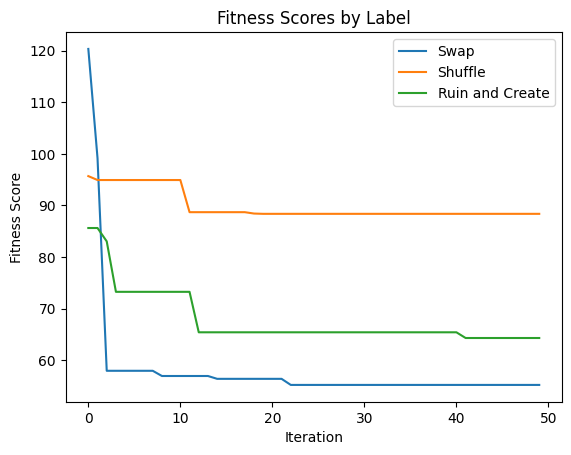

In [85]:
#  for operator in operator_list: 
#      print(operator["label"])
     


# Group the fitness data by label
grouped_fit = {}
for item in fit:
    label = item["label"]
    if label not in grouped_fit:
        grouped_fit[label] = {"y": []}
    # grouped_fit[label]["x"].append(item["iteration"])
    grouped_fit[label]["y"].append(item["fitness_score"])

# print(grouped_fit)

# Plot a line chart of the grouped fitness data
fig, ax = plt.subplots()
for label, data in grouped_fit.items():
    # ax.plot(data["x"], data["y"], label=label)
    ax.plot(data["y"],label=label)
ax.set_ylabel("Fitness Score")
ax.set_xlabel("Iteration")
ax.set_title("Fitness Scores by Label")
ax.legend()
plt.show()